<h1> Regression Learning <h1>

<h2> Linear vs Logistic Regression </h2>

<h4> Linear Regression </h4>
Linear Regression is a statistical method that is used to show the relationship between two variables.

It is a straight line through data points that best describe how the predictor affects the outcome. 

The formula is y=β0+β1x+ε

Where:

y is the dependent variable (what you're trying to predict)

x is the independent variable (what you're using to predict)

β0 is the intercept (where the line crosses the y-axis)

β1 is the slope (how much y changes for each unit change in x)

ε is the error term (random noise)


<h4> Logistic Regression </h4>
Logistic regression is a statistical method that is used when your outcome (dependent variable) is categorical.  

Instead of predicting a number like in linear regression, logistic regression predicts the probability that something belongs to a certain category.  

The formula is P(y=1|x) = 1 / 1 + e^-(B0 +B1x)

This function squishes the output between 0 and 1 so you get a probability.  If P > .5 then predict 1 and if P≤0.5, predict 0 (default threshold, but can be adjusted)


<h4> Main Takeaway </h4>
Use linear regression for predicting continuous values
Use logistic regression for predicting cateogries (usually binary)

<h3> Linear Regression Example </h3>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Data For Linear Regression To Predict House Price Using SqFt

sqft = np.array([1000, 1300, 1400, 1950, 2100]).reshape(-1,1)
price = np.array([200, 240, 300, 360, 400])


In [26]:
#Create and train the model
model = LinearRegression()
model.fit(sqft, price)

#Predict Prices
prediction = model.predict(sqft)

#Print the Equation
intercept = model.intercept_
slope = model.coef_[0]
print(f"Price = {intercept:2f} + {slope:3f} * Sqft")

Price = 28.294118 + 0.175294 * Sqft


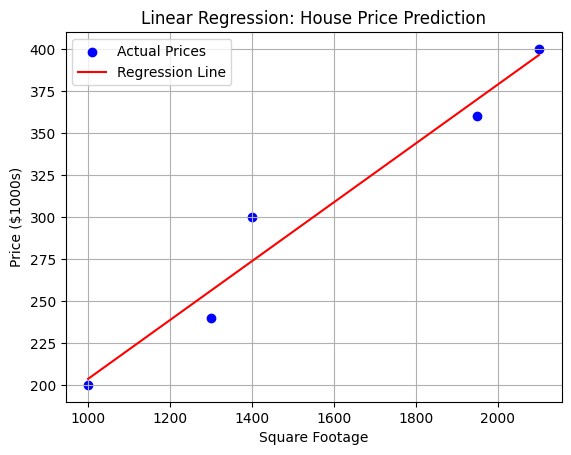

In [27]:
# Plotting on a scatter plot
plt.scatter(sqft, price, color='blue', label='Actual Prices')
plt.plot(sqft, prediction, color='red', label='Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('Price ($1000s)')
plt.title('Linear Regression: House Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
#Predict based on New Home with 1600 sqft

new_sqft = np.array([[1600]]) 
predicted_price = model.predict(new_sqft)[0]

print(f"Predicted price for a 1600 sq ft house: ${predicted_price:.2f}")

Predicted price for a 1600 sq ft house: $308.76


In [30]:
#Predict based on New Home with 600 sqft

new_sqft = np.array([[600]]) 
predicted_price = model.predict(new_sqft)[0]

print(f"Predicted price for a 600 sq ft house: ${predicted_price:.2f}")

Predicted price for a 600 sq ft house: $133.47


<h3> Logistic Regression Example </h3>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Data to predict if a student will pass or fail an exam based on hours studied where 1 = Passed and 0 = Failed
hours = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
passed = np.array([0, 0, 1, 0, 1, 1])



In [20]:
# Create and train the model
model = LogisticRegression()
model.fit(hours, passed)

# Predict probabilities
x_vals = np.linspace(0, 7, 100).reshape(-1, 1)
probabilities = model.predict_proba(x_vals)[:, 1] 


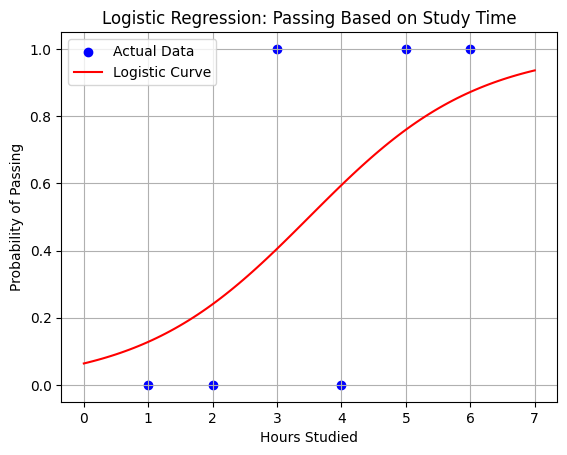

In [21]:
# Plot on scatter plot
plt.scatter(hours, passed, color='blue', label='Actual Data')
plt.plot(x_vals, probabilities, color='red', label='Logistic Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Passing Based on Study Time')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#Predict with new student data 
new_student = np.array([[5.5]])
pred_prob = model.predict_proba(new_student)[0, 1]
print(f"Probability of passing with 5.5 hours of studying: {pred_prob:.2f}")



Probability of passing with 5.5 hours of studying: 0.82


In [24]:
#Predict with new student data
new_student = np.array([[2.5]])
pred_prob = model.predict_proba(new_student)[0, 1]
print(f"Probability of passing with 5.5 hours of studying: {pred_prob:.2f}")

Probability of passing with 5.5 hours of studying: 0.32
